# Sea Surface Temperature gradients

This Jupyter notebook reproduces Figure 2 of the manuscript "Global changes in oceanic mesoscale currents over the satellite altimetry record". Sea Surface Temperature gradients are defined as,

\begin{equation}
    \left|\nabla \mathrm{SST} \right| = \sqrt{ \left(\frac{\partial \mathrm{SST}}{\partial x}\right)^2 + \left(\frac{\partial \mathrm{SST}}{\partial y}\right)^2 }.
\end{equation}

Maps of SST in Figure 2 of this study correspond to the the time-mean SST:
\begin{equation}
    \overline{\left|\nabla \mathrm{SST} \right|}(x,y) = \overline{\sqrt{ \left(\frac{\partial \mathrm{SST}}{\partial x}\right)^2 + \left(\frac{\partial \mathrm{SST}}{\partial y}\right)^2 }}
\end{equation}

Then linear trends are computed with a modified Mann-Kendall test (See Methods of manusript).


In [1]:
# Import libraries
import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs

import pylab as plt
import numpy as np
# Inline plotting
%matplotlib inline

In [2]:
from plot_utils import truncate_colormap, ccrs_land, add_patches, area, vectorize

### Load $\left|\nabla \mathrm{SST} \right|$ timeseries dataset:

In [3]:
dataset_SST_grad = xr.open_dataset('../datasets/SST_grad_timeseries.nc')

In [4]:
print(dataset_SST_grad)

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 10593)
Coordinates:
  * time     (time) datetime64[ns] 1992-01-01T12:00:00 ... 2020-12-31T12:00:00
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    SST      (time, lat, lon) float32 ...
Attributes:
    title:         Sea Surface Temperature (SST) gradients
    Description:   SST gradients computed from OISST-NOAA.
    Publication:   Dataset created for Martínez-Moreno, J. et. al. 2020: \n '...
    Author:        Josué Martínez-Moreno
    Contact:       josue.martinezmoreno@anu.edu.au
    Created date:  21/01/2021 11:11:38


In [5]:
grid_area = area(dataset_SST_grad.lat,dataset_SST_grad.lon)

Compute time-mean and load trends:

In [6]:
SST_grad = dataset_SST_grad.SST

Slice data between 60°S - 60°N. Note that satellite observations resolve mesoscale eddies between 60°S - 60°N, the effective resolution outside these latitudes is larger than the Rossby radius of deformation.

In [7]:
SST_grad_slice = SST_grad.sel(lat=slice(-60,60))

Compute mean $\overline{\left|\nabla \mathrm{SST} \right|}(x,y)$ gradient.

In [8]:
mean_SST_grad = SST_grad_slice.mean('time')

In [9]:
print(mean_SST_grad)

<xarray.DataArray 'SST' (lat: 120, lon: 360)>
array([[1.7291414e-06, 1.5500717e-06, 1.5529588e-06, ..., 1.7327591e-06,
        1.7360002e-06, 1.8385412e-06],
       [2.0202303e-06, 1.8099900e-06, 1.8485226e-06, ..., 1.9606987e-06,
        1.9292825e-06, 2.0863056e-06],
       [2.2306874e-06, 2.1113681e-06, 2.2479198e-06, ..., 2.2451075e-06,
        2.0758175e-06, 2.2738309e-06],
       ...,
       [6.0400162e-06, 6.1240785e-06, 5.8088799e-06, ..., 6.0963184e-06,
        4.3867876e-06, 6.5916288e-06],
       [4.9052151e-06, 4.5858628e-06, 5.3091799e-06, ..., 4.4891131e-06,
        5.2204618e-06, 6.6736261e-06],
       [5.2419591e-06, 4.6031319e-06, 6.0413154e-06, ..., 5.5362220e-06,
        6.4107994e-06, 8.6072969e-06]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -59.5 -58.5 -57.5 -56.5 -55.5 ... 56.5 57.5 58.5 59.5


### Import trends

In [10]:
SST_trends = xr.open_dataset('../datasets/SST_trends.nc')
SST_grad_trends = xr.open_dataset('../datasets/SST_grads_trends.nc')

Trends units are $^\circ C m^{-1} day^{-1}$, thus, here we convert to $\circ C m^{-1} decade^{-1}$ by multipling by 3650 days.

In [11]:
SST_per_decade = ( SST_trends.trend * 10*365 )# Trends per day multiplied by 3650 days to report per decade.
SST_grad_per_decade = ( SST_grad_trends.trend * 10*365 )# Trends per day multiplied by 3650 days to report per decade.

Slice data between 60°S - 60°N.

In [12]:
SST_trends = SST_per_decade.sel(y=slice(-60,60)) 
SST_grad_trends = SST_grad_per_decade.sel(y=slice(-60,60)) 

In [13]:
SST_trends

<xarray.DataArray 'trend' (y: 120, x: 360)>
array([[0.02959394, 0.03053385, 0.03356104, ..., 0.0219346 , 0.02153266,
        0.026522  ],
       [0.03130211, 0.03315917, 0.03412712, ..., 0.03271274, 0.02882843,
        0.02916009],
       [0.03411397, 0.03321657, 0.03611327, ..., 0.04377426, 0.03884789,
        0.03582945],
       ...,
       [0.341498  , 0.34752269, 0.37632513, ..., 0.3474847 , 0.35415749,
        0.34872884],
       [0.34542306, 0.33415373, 0.34485283, ..., 0.34152542, 0.34578207,
        0.34556721],
       [0.36455014, 0.37768177, 0.35559635, ..., 0.31964143, 0.32435057,
        0.35770826]])
Coordinates:
  * x        (x) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * y        (y) float32 -59.5 -58.5 -57.5 -56.5 -55.5 ... 56.5 57.5 58.5 59.5

In [14]:
SST_grad_trends

<xarray.DataArray 'trend' (y: 120, x: 360)>
array([[ 4.70343095e-08,  5.85862628e-08, -1.30247053e-08, ...,
         3.70942849e-08,  2.03813406e-08, -1.06791083e-08],
       [-2.39612111e-08, -6.83456707e-09, -4.51744886e-08, ...,
        -4.63719903e-09,  2.33078457e-08, -2.92824022e-08],
       [-7.98069740e-08, -7.14080282e-08, -2.58938224e-08, ...,
        -6.19942262e-08,  5.01421502e-09, -3.28333085e-08],
       ...,
       [-4.62641331e-07, -4.76517160e-07, -4.44547125e-07, ...,
         3.35750872e-07, -2.67971251e-07, -2.77733602e-07],
       [-4.37578615e-07, -5.41026152e-07, -6.03578356e-07, ...,
        -2.31771089e-07, -1.02028944e-07, -8.98212936e-08],
       [-6.63473004e-07, -4.66221489e-07, -5.62056955e-07, ...,
        -2.35423569e-07,  7.84440909e-08,  2.33381505e-08]])
Coordinates:
  * x        (x) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * y        (y) float32 -59.5 -58.5 -57.5 -56.5 -55.5 ... 56.5 57.5 58.5 59.5

### Plot figure 2 of manuscript

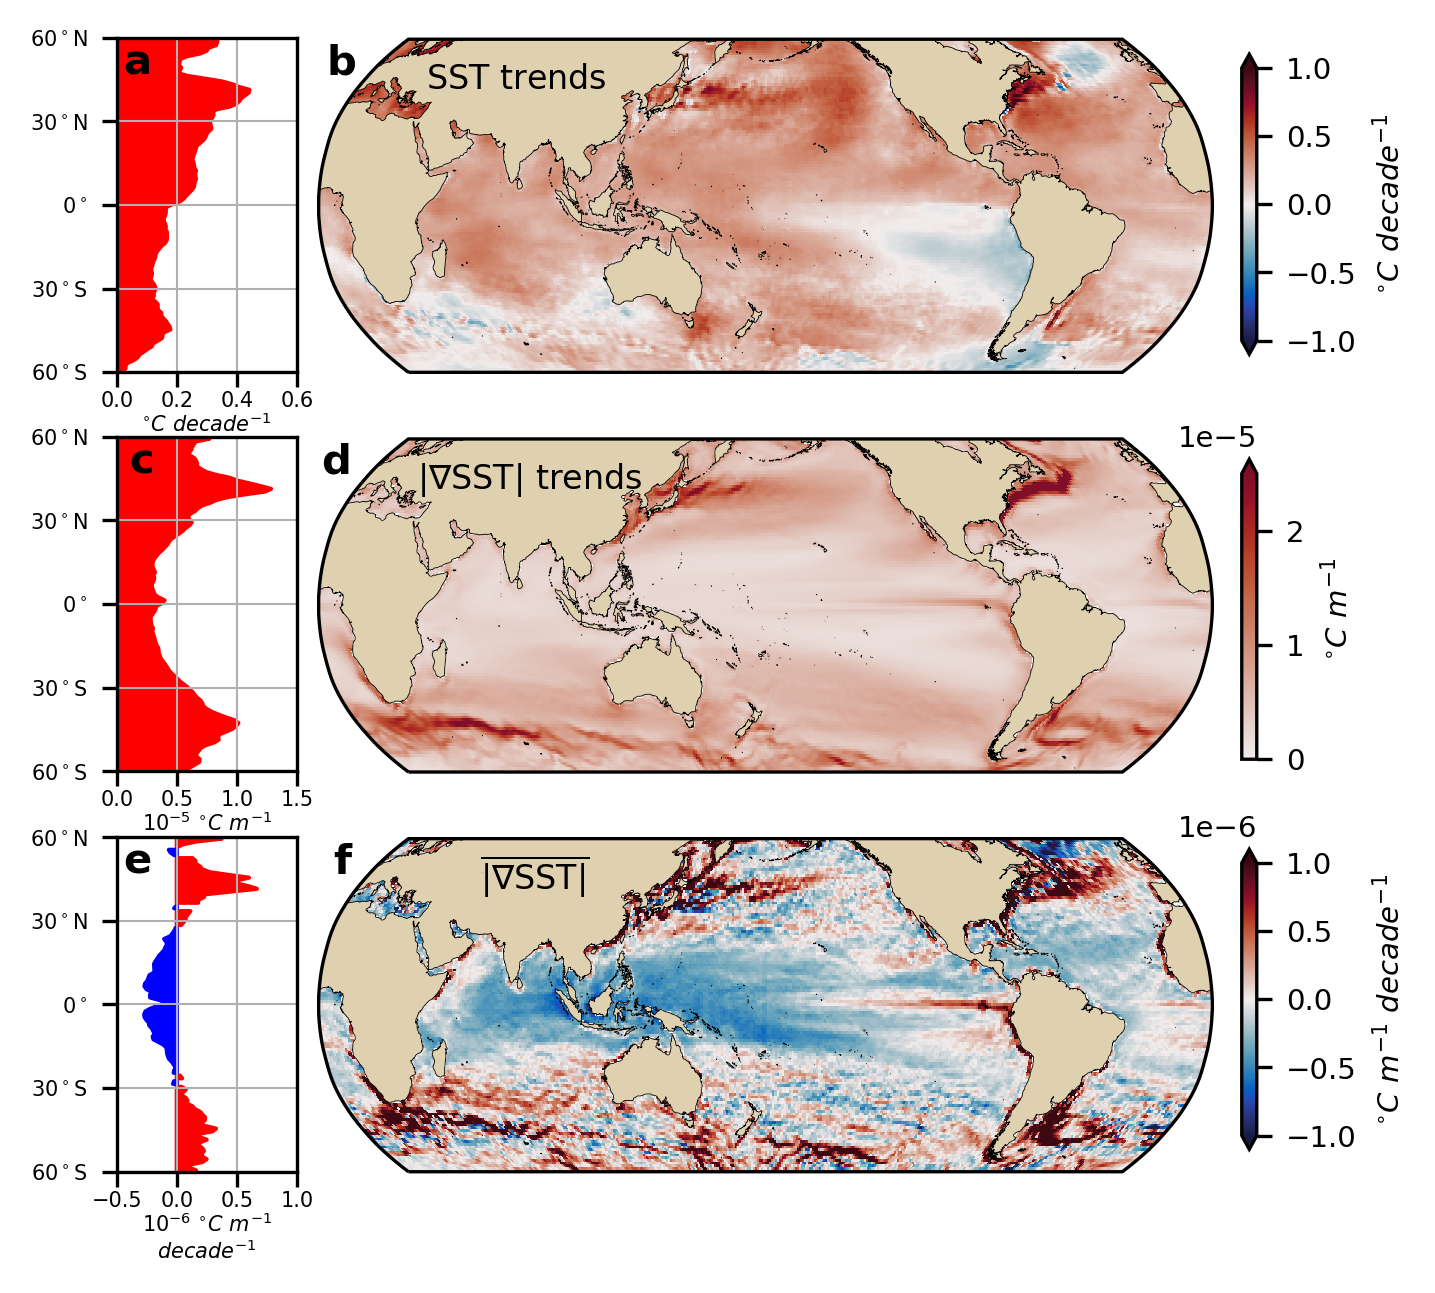

In [15]:
plt.rcParams['xtick.major.pad']='1'

fig = plt.figure(figsize=(5, 5),dpi=300)

ax1 = fig.add_subplot(3, 1, 1, projection = ccrs.Robinson(central_longitude=180))

clm1 = SST_trends.plot(ax=ax1, transform = ccrs.PlateCarree(), add_colorbar=False,
              cmap = cm.cm.balance, vmin = -1, vmax = 1, rasterized=True)
ax1.set_extent([0.1,359.99,-60, 60], crs=ccrs.PlateCarree())
ax1.add_feature(ccrs_land)
add_patches(ax1)

ax_w1 = plt.axes([0.08, 0.658, 0.12, 0.223])

zonal_sum_sst=(SST_trends.T).mean('x')
zonal_sum_sst=zonal_sum_sst

pos=np.ma.masked_where(zonal_sum_sst<0, zonal_sum_sst)
ax_w1.fill_betweenx(zonal_sum_sst.y, pos*0, pos, color='r')

neg=np.ma.masked_where(zonal_sum_sst>0, zonal_sum_sst)

ax_w1.fill_betweenx(zonal_sum_sst.y, neg, neg*0, color='b')

ax_w1.set_ylim(-60,60)
ax_w1.set_xlim(0,0.6)
ax_w1.set_xlabel("$^{\circ}C\ decade^{-1}$",fontsize=5)
ax_w1.xaxis.set_label_coords(0.5, -0.12)
ax_w1.xaxis.set_major_locator(plt.MaxNLocator(3))

ax_w1.tick_params(axis='both', which='major', labelsize=5)
ax_w1.set_yticks(range(-60,61,30))
ax_w1.set_yticklabels(['60$^\circ$S','30$^\circ$S','0$^\circ$','30$^\circ$N','60$^\circ$N'])
ax_w1.grid(linewidth=0.5)
ax_w1.text(0.02,47,'a',fontweight='bold')
ax_w1.text(0.7,47,'b',fontweight='bold')

###############################################################
###############################################################
###############################################################

ax2 = fig.add_subplot(3, 1, 2, projection = ccrs.Robinson(central_longitude=180))

clm2 = mean_SST_grad.plot(ax=ax2, transform = ccrs.PlateCarree(), add_colorbar=False,
              cmap = truncate_colormap(cm.cm.amp, 0, 0.8), vmin = 0, vmax = 2.5e-5, rasterized=True)
ax2.set_extent([0.1,359.99,-60, 60], crs=ccrs.PlateCarree())
ax2.add_feature(ccrs_land)
add_patches(ax2)

ax_w2 = plt.axes([0.08, 0.392, 0.12, 0.223])

zonal_sum_tke=(mean_SST_grad.T).mean('lon')
zonal_sum_tke=zonal_sum_tke*1e5

pos=np.ma.masked_where(zonal_sum_tke<0, zonal_sum_tke)
ax_w2.fill_betweenx(zonal_sum_tke.lat, pos*0, pos, color='r')

neg=np.ma.masked_where(zonal_sum_tke>0, zonal_sum_tke)

ax_w2.fill_betweenx(zonal_sum_tke.lat, neg, neg*0, color='b')

ax_w2.set_ylim(-60,60)
ax_w2.set_xlim(0,1.5)
ax_w2.set_xlabel("$10^{-5}\ ^{\circ}C\ m^{-1}$",fontsize=5)
ax_w2.xaxis.set_label_coords(0.5, -0.12)
ax_w2.xaxis.set_major_locator(plt.MaxNLocator(3))

ax_w2.tick_params(axis='both', which='major', labelsize=5)
ax_w2.set_yticks(range(-60,61,30))
ax_w2.set_yticklabels(['60$^\circ$S','30$^\circ$S','0$^\circ$','30$^\circ$N','60$^\circ$N'])
ax_w2.grid(linewidth=0.5)
ax_w2.text(0.1,47,'c',fontweight='bold')
ax_w2.text(1.7,47,'d',fontweight='bold')

###############################################################
###############################################################
###############################################################

ax3 = fig.add_subplot(3, 1, 3, projection = ccrs.Robinson(central_longitude=180))

clm3 = SST_grad_trends.plot(transform=ccrs.PlateCarree(), add_colorbar=False,
              cmap=cm.cm.balance, vmin=-1e-6, vmax=1e-6,ax=ax3, rasterized=True)
ax3.set_extent([0.1,359.99,-60, 60], crs=ccrs.PlateCarree())
ax3.add_feature(ccrs_land)
add_patches(ax3)

ax_w3 = plt.axes([0.08, 0.125, 0.12, 0.223])

increase_tke_gw=(SST_grad_trends.mean('x'))*1e6

pos=np.ma.masked_where(increase_tke_gw<0, increase_tke_gw)
ax_w3.fill_betweenx(increase_tke_gw.y, pos*0 , pos, color='r')

neg=np.ma.masked_where(increase_tke_gw>0, increase_tke_gw)

ax_w3.fill_betweenx(increase_tke_gw.y, neg, neg*0, color='b')

ax_w3.set_ylim(-60,60)
ax_w3.set_xlim(-0.5,1.0)
ax_w3.set_xlabel("$10^{-6}\ ^{\circ}C\ m^{-1}$" "\n" r"$decade^{-1}$",fontsize=5)
ax_w3.xaxis.set_label_coords(0.5, -0.12)
ax_w3.xaxis.set_major_locator(plt.MaxNLocator(3))

ax_w3.tick_params(axis='both', which='major', labelsize=5)
ax_w3.set_yticks(range(-60,61,30))
ax_w3.set_yticklabels(['60$^\circ$S','30$^\circ$S','0$^\circ$','30$^\circ$N','60$^\circ$N'])
ax_w3.grid(linewidth=0.5)
ax_w3.text(-0.45,47,'e',fontweight='bold')
ax_w3.text(1.3,47,'f',fontweight='bold')

#### Colorbars ####

cbar_ax = fig.add_axes([0.83, 0.67, 0.01, 0.2])
cbar=fig.colorbar(clm1, cax=cbar_ax,orientation='vertical',extend='both')
cbar.set_label('$^{\circ}C\ decade^{-1}$', rotation=90, fontsize=7)
cbar.ax.tick_params(labelsize=7)

cbar_ax = fig.add_axes([0.83, 0.40, 0.01, 0.2])
cbar=fig.colorbar(clm2, cax=cbar_ax,orientation='vertical',extend='max')
cbar.set_label(r'$^{\circ}C\ m^{-1}$', rotation=90, fontsize=7)
cbar.ax.tick_params(labelsize=7) 
cbar.ax.yaxis.get_offset_text().set(size=7)

cbar_ax = fig.add_axes([0.83, 0.14, 0.01, 0.2])
cbar=fig.colorbar(clm3, cax=cbar_ax,orientation='vertical',extend='both')
cbar.set_label(r'$^{\circ}C\ m^{-1}\ decade^{-1}$', rotation=90, fontsize=7)
cbar.ax.tick_params(labelsize=7)
cbar.ax.yaxis.get_offset_text().set(size=7)

##### Titles #####
ax1.text(0.12,0.85,r'$\mathrm{SST}$ trends',fontsize=8,transform=ax1.transAxes)
ax3.text(0.18,0.85,r'$\overline{|\nabla \mathrm{SST}|}$',fontsize=8,transform=ax3.transAxes)
ax2.text(0.11,0.85,r'$|\nabla \mathrm{SST}|$ trends',fontsize=8,transform=ax2.transAxes)

plt.savefig('../LaTeX/figures/global_SST_SST_grad_SSH_trends.pdf',dpi=300,bbox_inches='tight')

**Figure 2 Sea Surface Temperature (SST) trends, mean SST gradient magnitude, and SST gradient magnitude trends between 1993-2019.** (c) zonally averaged time-mean of
333 SST gradient magnitude; (d) map of time-mean of SST gradients magnitude; (e) zonally averaged SST gradient trend; (f) map of SST gradient trends (81.6% of global area is significant above 95% confidence level). In panel (d), solid contours show positive SST gradient trends and dashed contours show negative SST gradient trends (±0.5 × 10−6 ◦C m−1decade−1). Note that the spatial pattern of SST gradient maps is independent of the temporal extent of the SST gradient record used to compute SST gradient trends (Fig. S2).

*Note: Figure 2 a & b corresponds to the OISST trends from NOAA (See Methods).*